In [1]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.scalar_mediator import ScalarMediator
from hazma.scalar_mediator import HiggsPortal, HeavyQuark
from hazma.parameters import top_quark_mass as mt
from utilities import get_color, get_tex_label, latex_text_width_1col

## Branching fractions as a function of $m_\chi$

### Higgs portal couplings

/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


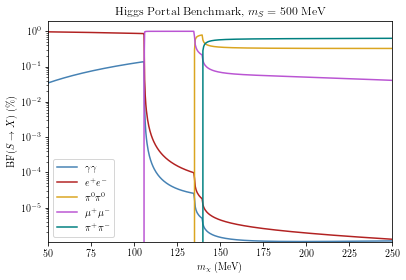

In [2]:
mx_min, mx_max, n_mxs = 50., 250, 500
mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

hp_args = {"mx": 250., "ms": 500., "gsxx": 1., "stheta":1e-3}
hp = HiggsPortal(**hp_args)

vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

bfs_varying_gs = {}

# Compute branching fractions for different couplings
bfs_raw = []
for mx in mxs:
    hp.mx = mx
    e_cm = 2. * hp.mx * (1. + 0.5 * vx_mw**2)
    bfs_raw.append(hp.branching_fractions(e_cm))
    
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in hp.list_final_states()}

### Make the plot
plt.figure(figsize=(latex_text_width_1col, 4))

for fs, bf_list in bfs.iteritems():
    if fs != "s s":
        plt.plot(mxs, bf_list, label=get_tex_label(fs))

plt.title(r"Higgs Portal Benchmark, $m_{S} = 500$ MeV")
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel(r"BF($S\to X$) (\%)")
plt.yscale("log")
plt.legend()
plt.xlim(mxs[[0, -1]])
plt.ylim(0, 1.9)

plt.tight_layout()
# plt.savefig("figures/scalar_branching_fractions_higgs_portal.pdf")

### Heavy quark couplings

/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


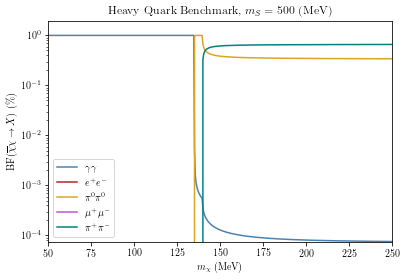

In [2]:
mx_min, mx_max, n_mxs = 50., 250, 500
mxs = np.logspace(np.log10(mx_min), np.log10(mx_max), n_mxs)

hq_args = {"mx": 250., "ms": 500., "gsxx": 1., "gsQ": 1., "mQ": 1e6, "QQ": 1.}
hq = HeavyQuark(**hq_args)

vx_mw = 1.0e-3  # approximate DM velocity in Milky Way halo

bfs_varying_gs = {}

# Compute branching fractions for different couplings
bfs_raw = []
for mx in mxs:
    hq.mx = mx
    e_cm = 2. * hq.mx * (1. + 0.5 * vx_mw**2)
    bfs_raw.append(hq.branching_fractions(e_cm))
    
bfs = {fs: [bf[fs] for bf in bfs_raw] for fs in hq.list_final_states()}

### Make the plot
plt.figure(figsize=(latex_text_width_1col, 4))

for fs, bf_list in bfs.iteritems():
    if fs != "s s":
        plt.plot(mxs, bf_list, label=get_tex_label(fs))

plt.title("Heavy Quark Benchmark, $m_{S} = 500$ (MeV)")
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel(r"BF$(\overline{\chi}\chi\to X)$ (\%)")
plt.yscale("log")
plt.xscale("linear")
plt.legend()
plt.xlim(mxs[[0, -1]])
plt.ylim(0, 1.9)

plt.tight_layout()
# plt.savefig("figures/scalar_branching_fractions_heavy_quark.pdf")

## Branching fractions for mediator decay

### Higgs portal

(4.2394248707637134e-07, 1.9)

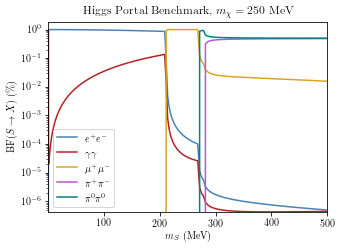

In [3]:
mx = 250.

ms_min, ms_max, n_mss = 1., 2. * mx, 500
mss = np.logspace(np.log10(ms_min), np.log10(ms_max), n_mss)

hp_args = {"mx": 250., "ms": 500., "gsxx": 1., "stheta":1e-3}
hp = HiggsPortal(**hp_args)

# Compute branching fractions for different couplings
bfs_raw = []
for ms in mss:
    hp.ms = ms
    bfs_raw.append(hp.partial_widths())
    
bfs = {fs: np.array([bf[fs] for bf in bfs_raw]) for fs in ['mu mu', 'e e', 'g g', 'pi0 pi0', 'pi pi', "total"]}
bfs = {fs: widths / bfs["total"] for fs, widths in bfs.iteritems() if fs != "total"}

### Make the plot
plt.figure(figsize=(5, 3.5))

for fs, bf_list in bfs.iteritems():
#     if fs != "s s":
    plt.plot(mss, bf_list, label=get_tex_label(fs))

# plt.xscale("log")
# plt.yscale("log")
plt.title("Higgs Portal Benchmark, $m_{\chi} = 250$ MeV")
plt.xlabel(r"$m_S$ (MeV)")
plt.ylabel(r"BF($S\to X$) (\%)")
plt.legend()
plt.xlim(mss[[0, -1]])
plt.yscale("log")
plt.ylim(0, 1.9)

# plt.savefig("figures/scalar_branching_fractions_higgs_portal.pdf")

### Heavy Quarks

(2.8261051490983887e-05, 1.9)

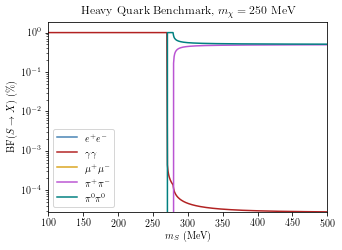

In [5]:
mx = 250.

ms_min, ms_max, n_mss = 100., 2. * mx, 500
mss = np.linspace(ms_min, ms_max, n_mss)

hq_args = {"mx": 250., "ms": 500., "gsxx": 1., "gsQ": 1., "mQ": 1e6, "QQ": 1.}
hq = HeavyQuark(**hq_args)

# Compute branching fractions for different couplings
bfs_raw = []
for ms in mss:
    hq.ms = ms
    bfs_raw.append(hq.partial_widths())
    
bfs = {fs: np.array([bf[fs] for bf in bfs_raw]) for fs in ['mu mu', 'e e', 'g g', 'pi0 pi0', 'pi pi', "total"]}
bfs = {fs: widths / bfs["total"] for fs, widths in bfs.iteritems() if fs != "total"}

### Make the plot
plt.figure(figsize=(5, 3.5))

for fs, bf_list in bfs.iteritems():
#     if fs != "s s":
    plt.plot(mss, bf_list, label=get_tex_label(fs))

# plt.xscale("log")
# plt.yscale("log")
plt.title("Heavy Quark Benchmark, $m_{\chi} = 250$ MeV")
plt.xlabel(r"$m_S$ (MeV)")
plt.ylabel(r"BF($S\to X$) (\%)")
plt.legend()
plt.xlim(mss[[0, -1]])
plt.yscale("log")
plt.ylim(0, 1.9)

# plt.savefig("figures/scalar_branching_fractions_higgs_portal.pdf")